## Project 7- Image Segmentation and Classification

Healthcare organizations often deal with a significant volume of handwritten medical documents, including forms, prescriptions, and patient records. Manual digitization and analysis of these documents are time-consuming, error-prone, and resource-intensive, leading to inefficiencies and potential errors in patient care. To address these challenges, there is a need for an automated system that can accurately digitize and classify handwritten characters on medical documents, enabling efficient data entry and analysis.
      
Develop a deep learning-based solution capable of accurately classifying handwritten characters on medical documents using the MNIST dataset as a benchmark. The system should automatically process handwritten images, classify them into their respective digit categories (0 through 9), and output the digitized text for further analysis. The primary objective is to improve the efficiency, accuracy, and reliability of digitization processes in healthcare, ultimately enhancing patient care and administrative workflows

**Dataset Download details**

from keras.datasets import mnist

**Loading (downloaded if needed) the MNIST dataset** 

(X_train, y_train), (X_test, y_test) = mnist.load_data()

***Data Dictionary***

The mnist_train.csv file contains the 60,000 training examples and labels. The mnist_test.csv contains 10,000 test examples and labels. Each row consists of 785 values: the first value is the label (a number from 0 to 9) and the remaining 784 values are the pixel values (a number from 0 to 255).

**Initial Guidelines:**

1.Ensure to follow to Use Id’s provided by UNext for naming file as conventions.
2.Create GitHub account and submit the GitHub link.

### Software Engineering aspect:  

Utilize software engineering aspects while building Machine learning model using modular programming principles to organize your code into reusable functions or classes to enhance readability, maintainability, and collaboration.

### General Instructions

- The cells in the Jupyter notebook can be executed any number of times for testing the solution
- Refrain from modifying the boilerplate code as it may lead to unexpected behavior
- The solution is to be written between the comments `# code starts here` and `# code ends here`
- On completing all the questions, the assessment is to be submitted on moodle for evaluation
- Before submitting the assessment, there should be `no error` while executing the notebook. If there are any error causing code, please comment it.
- The kernel of the Jupyter notebook is to be set as `Python 3 (ipykernel)` if not set already
- Include imports as necessary
- For each of the task, `Note` section will provide you hints to solve the problem.
- Do not use `PRINT` statement inside the `Except` Block. Please use `return` statement only within the except block

### Task 1: Load the dataset and perform preliminary EDA (Exploratory Data Analysis) with key observations and insights-      (weightage - 10 marks)

#### T1.1Load the MNIST dataset using try and except blocks. State the dimensions of Train and Test dataset  (weightage – 1 mark)           (AE)

In [1]:
# Required imports
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

2024-07-18 12:22:55.412624: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-18 12:22:56.577671: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-18 12:22:56.581698: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-18 12:22:58.906280: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#### Note

* Design a method named `load_mnist_data` to load the MNIST dataset using TensorFlow's `tf.keras.datasets.mnist.load_data() method`.
* Load the MNIST data using `tf.keras.datasets.mnist.load_data()` and unpack the returned tuples. 
* Return X train,y train, X test and y test

In [2]:
def load_mnist_data():
    try:
        # Load MNIST data
        (X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
        return X_train, y_train, X_test, y_test
    except Exception as e:
        return "An error occurred while loading MNIST data"

In [3]:
X_train,y_train, X_test, y_test= load_mnist_data()

if X_train is not None:
    print("MNIST data loaded successfully.")
else:
    print("Failed to load MNIST data.")

MNIST data loaded successfully.


##### Dimension of the Train and Test Dataset 

#### Note

* Design a method named `check_dimensions` to check the dimensions (number of dimensions) of multiple numpy arrays.
* Use the `*arrays` syntax to accept a variable number of arrays as input.
* Use the `ndim` attribute to get its number of dimensions (array.ndim) and append it to the `dimensions` list.
* Return 

In [4]:
def check_dimensions(*arrays):
    dimensions = []
    # Code starts here
    for array in arrays:
        dimensions.append(array.ndim)
    return dimensions

    # Code ends here
    return dimensions

In [5]:
check_dimensions(X_train,X_test,y_train,y_test)

[3, 3, 1, 1]

#### Task 1.2: Shape of the Train and Test Dataset  (weightage – 1 mark)           (AE)

#### Note

* Design a method named `get_shapes` to retrieve the shapes (dimensions) of multiple numpy arrays.
* Use the `arrays` syntax to accept a variable number of arrays as input.
* Use the `shape` attribute to get its shape (array.shape) and append it to the shapes list.

In [6]:
def get_shapes(*arrays):
    shapes = []
    # Code starts here
    for array in arrays:
        shapes.append(array.shape)
    # Code ends here
    return shapes

In [7]:
get_shapes(X_train,y_train,X_test,y_test)

[(60000, 28, 28), (60000,), (10000, 28, 28), (10000,)]

In [8]:
X_train.shape

(60000, 28, 28)

#### T1.3: Visualize the image of 100, 101,201 & 600 image on the train dataset  (weightage – 1 mark)           (ME)

#### Note

* Design a method named `visualize` to display a set of images from an array using matplotlib.
* Use `plt.subplot()` to create subplots for each image and plot them accordingly.
* Set the colormap to grayscale using `cmap='gray'` in `plt.imshow()` for grayscale visualization.
* Adjust the subplot layout to ensure the images are displayed properly without overlapping. You can use plt.subplots() to create a figure with multiple subplots and control their arrangement.
* Call `plt.show()` to display the plotted images after setting up the subplots.

In [9]:
def visualize(images):
    if len(images) == 1:
        plt.figure()
        plt.imshow(images[0], cmap='gray')
        plt.axis('off')
        plt.show()
    else:
        fig, axs = plt.subplots(1, len(images), figsize=(10, 5))
        for i, ax in enumerate(axs):
            ax.imshow(images[i], cmap='gray')
            ax.set_axis_off()
        plt.show()

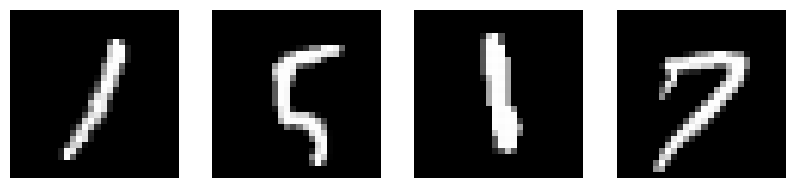

In [10]:
visualize([X_train[99], X_train[100], X_train[200], X_train[599]])

#### T1.4 : Represent the dataset X in a data frame after flattening the it ,and find out the first 5 values  (weightage - 1 mark) (AE)

#### Note

* Design a method named `preprocess_X_data` to reshape the input data (X_train and X_test) for further processing.
* Use reshape to have 60000 rows and 28 * 28 columns.
* Use reshape to have 10000 rows and 28 * 28 columns.
* Return reshaped X_train,X_test

In [11]:
def preprocess_X_data(X_train, X_test):
    
    # Reshape X_train and X_test
    reshaped_X_train = X_train.reshape(X_train.shape[0], -1)
    reshaped_X_test = X_test.reshape(X_test.shape[0], -1)
    
    # return reshaped X_train,X_test
    return reshaped_X_train, reshaped_X_test

In [12]:
X_train,X_test=preprocess_X_data(X_train,X_test)

In [13]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

#### Note

* Design a method named `convert_df` to convert NumPy arrays (X_train and X_test) to pandas DataFrames.
* Use `pd.DataFrame()` to convert X_train and X_test to pandas DataFrames.
* Assign the converted DataFrames to new variables
* Return the converted X_train and X_test

In [14]:
# Convert to DataFrame
def convert_df(X_train,X_test):
    
    # Convert X_train and X_test to pandas DataFrames
    X_train_df = pd.DataFrame(X_train)
    X_test_df = pd.DataFrame(X_test)
       
    # return the converted X_train and X_test
    return X_train_df, X_test_df

In [15]:
# Preprocess data using the function
preprocessed_X_train, preprocessed_X_test = convert_df(X_train, X_test)
print(preprocessed_X_train.head())
print(preprocessed_X_test.head())

   0    1    2    3    4    5    6    7    8    9    ...  774  775  776  777  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   778  779  780  781  782  783  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 784 columns]
   0    1    2    3    4    5    6    7    8    9    ...  774  775  776  777  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0

#### T1.5: Find out the summary statistics of X_train and X_test data set : (weightage - 1 mark) (AE)

#### Note

* Design a method named `describe_data` to describe the statistical properties of the input data (X_train and X_test).
* Use the reshape method to 2D arrays with a single dimension inferred automatically.
* Reshape `X_train` and `X_test` to maintain the number of rows and infer the number of columns based on the data.
* Convert the reshaped arrays to pandas DataFrames using `pd.DataFrame()`.
* Use the `describe` method on the DataFrames to compute descriptive statistics (mean, std, min, max, quartiles) for each column.
* Transpose the resulting descriptive statistics DataFrame using `transpose()` to have the statistics as rows and features as columns.
* Return Train Description and Test Description in the same order

In [16]:
def describe_data(X_train, X_test):
    # Reshape X_train and X_test to 2D arrays with inferred column dimension
    X_train_reshaped = np.reshape(X_train, (X_train.shape[0], -1))
    X_test_reshaped = np.reshape(X_test, (X_test.shape[0], -1))
    
    # # Convert to DataFrame and describe
    X_train_df = pd.DataFrame(X_train_reshaped)
    X_test_df = pd.DataFrame(X_test_reshaped)
    
    # Describe method to compute descriptive statistics
    train_description = X_train_df.describe().transpose()
    test_description = X_test_df.describe().transpose()

    # Return Train Description and Test Description
    return train_description, test_description

In [17]:
# Describe data using the function
train_description, test_description = describe_data(X_train, X_test)
print(train_description)
print(test_description)

       count   mean     std  min  25%  50%  75%   max
0    60000.0  0.000  0.0000  0.0  0.0  0.0  0.0   0.0
1    60000.0  0.000  0.0000  0.0  0.0  0.0  0.0   0.0
2    60000.0  0.000  0.0000  0.0  0.0  0.0  0.0   0.0
3    60000.0  0.000  0.0000  0.0  0.0  0.0  0.0   0.0
4    60000.0  0.000  0.0000  0.0  0.0  0.0  0.0   0.0
..       ...    ...     ...  ...  ...  ...  ...   ...
779  60000.0  0.002  0.3466  0.0  0.0  0.0  0.0  62.0
780  60000.0  0.000  0.0000  0.0  0.0  0.0  0.0   0.0
781  60000.0  0.000  0.0000  0.0  0.0  0.0  0.0   0.0
782  60000.0  0.000  0.0000  0.0  0.0  0.0  0.0   0.0
783  60000.0  0.000  0.0000  0.0  0.0  0.0  0.0   0.0

[784 rows x 8 columns]
       count  mean  std  min  25%  50%  75%  max
0    10000.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1    10000.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
2    10000.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
3    10000.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
4    10000.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
..       ...   ...  ...  ...  ... 

#### T1.6 : State the mean & Standard deviation of the image in test dataset present on index 35 (weightage - 1 mark) (AE)

#### Note

* Design a method named `calculate_mean_and_std_of_image` to compute the mean and standard deviation of an image.
* Use NumPy's `np.mean()` function to calculate the mean value of the image pixels: mean_value = np.mean(image).
* Similarly, use NumPy's `np.std()` function to calculate the standard deviation of the image pixels: `std_value = np.std(image)`.
* Return Mean Value and the Standard value in the same order

In [18]:
def calculate_mean_and_std_of_image(test_data, index):
    # Get the image at the specified index
    test_image = test_data[index]
    
    # Calculate mean and standard deviation
    image_mean = np.mean(test_image)
    image_std = np.std(test_image)

    return image_mean, image_std

In [19]:
# Calculate mean and standard deviation using the function
mean_value, std_value = calculate_mean_and_std_of_image(X_test, 35)

print(mean_value)
print(std_value)

37.31887755102041
80.99301022225657


#### T1.7: Plot the class frequency of y_train. Is there a class imbalance ? (weightage - 1 mark) (ME)

#### Note
* Visualize the distribution of classes in the training dataset y_train using a bar plot. 
* Calculate the frequency of each unique value in the Series y_train using `value_counts` method

In [20]:
#convert to series for the value counts
pd.Series(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [ ]:
#plot
pd.Series(y_train).value_counts().plot(kind = "barh")
plt.xlabel('Frequency')
plt.ylabel('Class Label')
plt.title('Class Frequency of y_train')
plt.show()

- Classes 1, 7, and 3 have the highest frequencies, with 6742, 6265, and 6131 occurrences respectively. These classes appear most frequently in the dataset.
- Class 5 has the lowest frequency among the classes listed, with 5421 occurrences.

#### T1.8: Normalize and scale the data (X_train, X_test) . Why is this step needed ? State the Normalized and Scaled Matrices  (weightage - 2 mark)(ME)

#### Note

* Design a method named `normalize_and_scale` to preprocess image data by normalizing and scaling pixel values.
* Use the `reshape` method to flatten images in `X_train` and `X_test` to 2D arrays with one dimension for each pixel.
* Scale pixel values in flattened arrays to range [0, 1] by dividing by 255.
* Normalize X_train and X_test by dividing by 255
* Apply scaling

In [22]:
from sklearn.preprocessing import scale

def normalize_and_scale(X_train, X_test):
    
    # Flatten the images
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    # Normalize inputs from 0-255 to 0-1
    # Scale the features
    X_train_scaled = X_train_flat / 255.0
    X_test_scaled = X_test_flat / 255.0
    
    return X_train_scaled, X_test_scaled

In [23]:
# Normalize and scale the features using the function
X_train_scaled, X_test_scaled = normalize_and_scale(X_train, X_test)

print(X_train_scaled)

print(X_test_scaled)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


- Normalization ensures that all input features (pixel values in this case) are on a similar scale, typically [0, 1]. This is important because it prevents certain features from dominating the learning process due to their larger numeric ranges.
- Scaling adjusts the range of data to a specified range or distribution. In this case, scaling pixel values to [0, 1] is particularly important because: Many machine learning algorithms assume input data is on a similar scale.

In [24]:
X_train_scaled.shape

(60000, 784)

#### T1.9: Reduce the data as per below :      (weightage - 1 mark) (AE)
* X_train[0:2000,1:]
* y_train[0:2000]
* X_test[2001:5000,1:]
* y_test[2001:5000] 
* state the dimension of the X_test  

#### Note

* Design a method named `reduce_data_size` to reduce the size of both training and test datasets based on provided sizes.
* Use slicing to select a subset of train_size samples from the beginning of `X_train` and `y_train`.
* Slice X_train and y_train to select rows and labels up to a specified train_size
* Similarly, use slicing to select a subset of test_size samples from `X_test` and `y_test`.
* Determine the dimensions of the reduced test data (X_test_reduced_dim) using the `shape` attribute.
* Return the Reduced X Train, Reduced Y train,Reduced X test, Reduced y test and the dimensions of the reduced X_test in the same order 

In [25]:
def reduce_data_size(X_train, y_train, X_test,y_test, train_size = 2000, test_size = 5000):
    # Slice to select train_size samples from the beginning of X_train and y_train
    X_train_reduced = X_train[:train_size, 1:]
    y_train_reduced = y_train[:train_size]
    
    # Slice to select test_size samples from X_test and y_test starting from index 2001
    X_test_reduced = X_test[2001:test_size, 1:]
    y_test_reduced = y_test[2001:test_size]
    
    # Determine the dimensions of the reduced test data (X_test_reduced_dim)
    X_test_reduced_dim = X_test_reduced.shape
    
    return X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced, X_test_reduced_dim


In [26]:
# Reduce the size of the data using the function

X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced, X_test_reduced_dim = reduce_data_size(
    X_train, y_train, X_test,y_test
)

print(X_test_reduced_dim)

(2999, 783)


In [27]:
X_train.shape

(60000, 784)

In [28]:
X_train_reduced.shape

(2000, 783)

### Task 2: Building Models and Optimizations 
Build deep learning model for Image classification.  (weightage - 65 Marks)

#### T2.1 Train the data with Support Vector Classifier on linear kernel and state the accuracy and Confusion Matrix . Write down your observations. (weightage - 4 marks)  (AE & ME)

#### NOTE
* Define a function named `linear` that trains and evaluates a linear Support Vector Classifier (SVC) model.
* Initialize a Support Vector Classifier (SVC) with a linear kernel `(kernel='linear')`
* Fit the classifier using the training data `(X_train_reduced and Y_train_reduced)`
* Predict labels for the test data `(X_test_reduced)`
* Calculate the accuracy using the `score` funtion of the model
* Calculate the confusion matrix using `metrics.confusion_matrix` with true labels. 
* Funtion `linear` MUST return both the accuracy score and the confusion matrix from your linear model in the same order.
* Return Accuracy and Confusion matrix in the same order

In [29]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [30]:
def linear(X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced):
    # Initialize SVC with linear kernel
    svc_linear = SVC(kernel='linear')
    
    # Fit the SVC model
    svc_linear.fit(X_train_reduced, y_train_reduced)
    
    # Predict on test data
    y_pred = svc_linear.predict(X_test_reduced)
    
    # Calculate accuracy
    accuracy = svc_linear.score(X_test_reduced, y_test_reduced)
    
    # Calculate confusion matrix
    confusion_mat = metrics.confusion_matrix(y_test_reduced, y_pred)
    
    # Return accuracy and confusion matrix
    return round(accuracy, 3), confusion_mat

##### accuracy-2 marks (AE), confusion_matrix(ME)-2marks

In [31]:
# print accuracy
accuracy = linear(X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced)[0]
print(accuracy)

0.856


In [32]:
# confusion matirx
confusion_matrix= linear(X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced)[1]

In [33]:
confusion_matrix

array([[271,   0,   8,   0,   1,   1,   1,   0,   2,   1],
       [  0, 330,   1,   3,   0,   1,   1,   0,   1,   0],
       [  4,   8, 279,   6,   2,   1,   2,   5,   4,   0],
       [  1,   1,  11, 231,   0,  34,   1,   6,   6,   2],
       [  0,   0,   4,   0, 243,   0,   4,   1,   1,  30],
       [  5,   5,   3,  20,   3, 225,   3,   4,   5,   4],
       [  5,   2,  17,   1,   3,   5, 249,   0,   1,   0],
       [  0,   7,  14,   3,   3,   1,   0, 262,   2,  15],
       [  8,   7,   6,  19,   3,  22,   3,   3, 216,  10],
       [  3,   5,   8,   8,  18,   3,   0,  18,   2, 261]])

#### T2.2 Train the data with Support Vector Classifier on rbf kernel with default gamma, and state the accuracy and Confusion Matrix    (weightage - 4 marks)  (AE)

Write down your observations. 

#### NOTE
* Define a function named `train_non_linear_svm` with four parameters: `X_train_reduced, y_train_reduced, X_test_reduced, and y_test_reduced`
* Create a Support Vector Classifier (SVC) with a radial basis function (RBF) kernel `(kernel='rbf')`
* Train the classifier using the training data
* Predict labels for the test data
* Calculate the confusion matrix using `metrics.confusion_matrix` 
* Calculate the accuracy score using `non_linear_model.score` on the test data.
* Funtion `train_non_linear_svm` MUST return both the accuracy score and the confusion matrix from your model in the same order.

In [34]:
# model
def train_non_linear_svm(X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced):
    # Create non-linear SVM model with RBF kernel

    # Initialize SVC with RBF kernel
    svc_rbf = SVC(kernel='rbf')
    
    # Train the SVC model
    svc_rbf.fit(X_train_reduced, y_train_reduced)
    
    # Predict on test data
    y_pred = svc_rbf.predict(X_test_reduced)
    
    # Calculate accuracy
    accuracy = svc_rbf.score(X_test_reduced, y_test_reduced)
    
    # Calculate confusion matrix
    confusion_mat = metrics.confusion_matrix(y_test_reduced, y_pred)
    
    # Return accuracy and confusion matrix
    return accuracy, confusion_mat

##### accuracy-2 marks (AE), confusion_matrix(ME)-2marks

In [35]:
# print accuracy
accuracy=train_non_linear_svm(X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced)[0]
print(accuracy)

0.9106368789596532


In [36]:
# print confusion_matrix
confusion_matrix=train_non_linear_svm(X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced)[1]

In [37]:
confusion_matrix

array([[277,   0,   2,   0,   1,   3,   1,   0,   1,   0],
       [  0, 330,   2,   3,   0,   0,   1,   1,   0,   0],
       [  2,   0, 290,   5,   4,   1,   1,   4,   4,   0],
       [  1,   1,   7, 248,   0,  27,   0,   4,   5,   0],
       [  0,   0,   1,   0, 258,   0,   4,   0,   0,  20],
       [  2,   1,   0,   4,   3, 255,   3,   4,   2,   3],
       [  6,   2,   6,   0,   4,   4, 261,   0,   0,   0],
       [  0,   9,   7,   1,   5,   0,   0, 274,   2,   9],
       [  2,   1,   6,   9,   3,  14,   2,   5, 248,   7],
       [  5,   6,   2,   4,  12,   1,   0,   5,   1, 290]])

#### T2.3 : **Model versioning** -    (weightage - 2 marks) ME

Save the initial version of a Support Vector Classifier on linear kernel codebase named 'linear_model’ and Support Vector Classifier on rbf kernel codebase named 'rbf_model' to a version control system GitHub using git commands for collaboration, tracking changes, and ensuring transparency in model development. 

#### Refer to the Github document from Lumen to create the repository and steps to commit 
#### Add your Github repository link below 

In [38]:
import joblib

In [39]:
# Initialize SVC with linear kernel
svc_linear = SVC(kernel='linear')

# Fit the SVC model
svc_linear.fit(X_train_reduced, y_train_reduced)

#save the linear model to afile named 'linear_model.pkl'
joblib.dump(svc_linear, 'linear_model.pkl')

['linear_model.pkl']

In [40]:
# Create non-linear SVM model with RBF kernel

# Initialize SVC with RBF kernel
svc_rbf = SVC(kernel='rbf')

# Train the SVC model
svc_rbf.fit(X_train_reduced, y_train_reduced)

# Save the RBF model to a file named 'rbf_model.pkl'
joblib.dump(svc_rbf, 'rbf_model.pkl')

['rbf_model.pkl']

#### T2.4 : Perform Hyper parameter tuning  and find the optimal values of C and gamma corresponding to RBF kernel    (weightage - 5 marks)  ME

Use 5 fold cross validation 
Represent the cv results in a data frame and state your observations  
Grid Search: Hyperparameter Tuning
Tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. 
Use 5-fold cross validation.

#### NOTE
* Define a function named `train_svm_with_grid_search` with two parameters: `X_train_reduced` and `y_train_reduced`
* Create a KFold cross-validation object with `5 splits` using `KFold`
* Define a range of hyperparameters for the Support Vector Machine (SVM) model. Hyperparameters include `gamma` and `C`
* Create an SVM model with a radial basis function `RBF` kernel
* Set up a GridSearchCV object (model_cv) with the SVM model, hyperparameter range, scoring method `('accuracy')`, `KFold`, and set verbose=0
* Fit the GridSearchCV object to the training data
* Return the cross-validation results, best score and best hyperparameters in the same order 

In [41]:
from sklearn.model_selection import KFold, GridSearchCV

In [42]:
# creating a KFold object with 5 splits 
def train_svm_with_grid_search(X_train_reduced, y_train_reduced):

    # Define KFold cross-validation with 5 splits
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Define range of hyperparameters
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.1, 1, 10]
    }
    
    # Define SVM model with RBF kernel
    svm_model = SVC(kernel='rbf')
    
    # Set up GridSearchCV
    model_cv = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=kf, verbose=1)
    
    # Fit the GridSearchCV object to the training data
    model_cv.fit(X_train_reduced, y_train_reduced)
    
    # Return cross-validation results, best score and best hyperparameters
    return model_cv.cv_results_, model_cv.best_score_, model_cv.best_params_

In [43]:
# Call the function to train SVM model with grid search
cv_results, best_score, best_hyperparams = train_svm_with_grid_search(X_train_reduced, y_train_reduced)

# Display the cross-validation results
cv_results_df = pd.DataFrame(cv_results)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [44]:
cv_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.126469,0.042805,0.520627,0.013163,0.1,scale,"{'C': 0.1, 'gamma': 'scale'}",0.8575,0.8775,0.8475,0.8225,0.8775,0.8565,0.020591,4
1,1.727174,0.047876,0.585091,0.012702,0.1,auto,"{'C': 0.1, 'gamma': 'auto'}",0.1000,0.0900,0.0875,0.1775,0.1175,0.1145,0.033219,5
2,1.714401,0.013455,0.591917,0.009900,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.1000,0.0900,0.0875,0.1125,0.1175,0.1015,0.011895,9
3,1.672007,0.030073,0.555075,0.004600,0.1,1,"{'C': 0.1, 'gamma': 1}",0.1000,0.0900,0.0875,0.1125,0.1175,0.1015,0.011895,9
4,1.667992,0.015686,0.569784,0.022093,0.1,10,"{'C': 0.1, 'gamma': 10}",0.1000,0.0900,0.0875,0.1125,0.1175,0.1015,0.011895,9


#### T2.5 State the optimal accuracy score and hyperparameters. (weightage - 5 marks) ME

- best_score (AE) weightage(3 marks)
- hyperparameters (ME) weightage (2marks)

In [45]:
# Call the function to train SVM model with grid search


# Display the best score best hyperparameters
print(round(best_score,3))

0.935


In [46]:
# Display the best hyperparameters
print(best_hyperparams)

{'C': 10, 'gamma': 'scale'}


#### T2.6 Build as base line model with Multilayered Perceptrons-1 layer  after one hot encoding the test data as per the architecture 784...> [784]--->10  (weightage - 5 marks) AE

Train data should be normalized and scaled and state the accuracy with 10 epochs , with RELU and Softmax activation, State the accuracy

### BASE MODEL WITH 1 LAYER 

#### NOTE
* Define a function named `build_and_train_mlp_on_reduced_data` with five parameters: `X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced, epochs`
* One-hot encode the labels using `to_categorical`
* Define the MLP model using `Sequential`
* Add a dense layer with 784 units and ReLU activation as the input layer and hidden layer.
* Add a dense layer with 10 units and softmax activation as the output layer for multiclass classification.
* Compile the model using `Adam optimizer` and `categorical crossentropy` loss function.
* Train the model using `model.fit`, with training data, labels, number of epochs, batch size, validation split of 0.1, and set verbose =0.
* Evaluate the model on test data using `model.evaluate`
* Return the test accuracy and the keys of the history dictionary

In [47]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [52]:
def build_and_train_mlp_on_reduced_data(X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced,
                                        epochs=10, batch_size = 32, verbose = 0):
    
    #scale the data
    X_train_reduced = X_train_reduced / 255.0
    X_test_reduced = X_test_reduced / 255.0
    
    # One-hot encode the labels
    y_train_reduced = to_categorical(y_train_reduced)
    y_test_reduced = to_categorical(y_test_reduced)
    
    # Define the MLP model
    model = Sequential()
    model.add(Dense(783, activation='relu', input_shape=(783,)))
    model.add(Dense(10, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train_reduced, y_train_reduced, epochs=epochs, batch_size=16,
                        validation_split=0.1, verbose=0)
    
    # Evaluate the model on test data
    test_loss, test_acc = model.evaluate(X_test_reduced, y_test_reduced, verbose=0)
    
    return test_acc, list(history.history.keys())
    

In [53]:
# build and train mlp on reduced data
test_accuracy, history_keys = build_and_train_mlp_on_reduced_data(X_train_reduced, y_train_reduced,
                                                                  X_test_reduced, y_test_reduced,epochs=10,batch_size=32)

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'History Keys: {list(history_keys)}')

Test Accuracy: 0.8930
History Keys: ['loss', 'accuracy', 'val_loss', 'val_accuracy']


#### T2.7 state the history keys post incorporating the validation_split=0.33  (weightage - 2 marks) ME

In [124]:
def build_and_train_mlp_on_reduced_data(X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced,
                                        epochs=10, batch_size = 32, verbose = 0):
    
    # One-hot encode the labels
    y_train_reduced = to_categorical(y_train_reduced)
    y_test_reduced = to_categorical(y_test_reduced)
    
    # Define the MLP model
    model = Sequential()
    model.add(Dense(783, activation='relu', input_shape=(783,)))
    model.add(Dense(10, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train_reduced, y_train_reduced, epochs=epochs, batch_size=16,
                        validation_split=0.33, verbose=0)
    
    # Evaluate the model on test data
    test_loss, test_acc = model.evaluate(X_test_reduced, y_test_reduced, verbose=0)
    
    return test_acc, list(history.history.keys())

In [125]:
# X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced are defined
test_accuracy, history_keys = build_and_train_mlp_on_reduced_data(X_train_reduced, y_train_reduced,
                                                                  X_test_reduced, y_test_reduced)

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'History Keys: {list(history_keys)}')


Test Accuracy: 0.8133
History Keys: ['loss', 'accuracy', 'val_loss', 'val_accuracy']


#### T2.8: Plot a graph to summarize the history for accuracy , validation_accuracy, loss , validation_loss (weightage - 5 marks) ME

#### NOTE
* Define a function named `build_and_train_mlp_on_reduced_data` with five parameters: `X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced, epochs`
* Normalize and scale the training and test data 
* One-hot encode the labels using `to_categorical`
* Define the MLP model using `Sequential`
* Add a dense layer with 784 units and ReLU activation, serving as both input and hidden layer. Follow it 
  with a dense layer featuring 10 units and softmax activation for multiclass classification.
* Compile the model using `Adam optimizer` and `categorical crossentropy` loss function.
* Train the model using `model.fit`, with training data, labels, number of epochs, batch size, validation   split of 0.1, and set verbose = 0.
* Evaluate the model on test data using `model.evaluate`
* Plot the training and validation accuracy and loss using `plt.plot`

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
def build_and_train_mlp_on_reduced_data(X_train_reduced, y_train_reduced, X_test_reduced,
                                              y_test_reduced, epochs=10, batch_size = 32, verbose = 0):
    
    # Normalize and scale the training and test data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_reduced)
    X_test_scaled = scaler.transform(X_test_reduced)
    
    # One-hot encode the labels
    y_train_encoded = to_categorical(y_train_reduced, num_classes=10)
    y_test_encoded = to_categorical(y_test_reduced, num_classes=10)
    
    # Define the MLP model
    model = Sequential([
        Dense(784, input_dim=X_train_scaled.shape[1], activation='relu'),
        Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
   
    # Train the model. Set verbose=0 to suppress output.
    history = model.fit(
        X_train_scaled, y_train_encoded,
        epochs=epochs, batch_size=16, validation_split=0.1, verbose=0)
    
    # Evaluate the model on test data. Set verbose=0 to suppress output.
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
    print(f'Test loss: {round(test_loss, 3)}')
    print(f'Test accuracy: {round(test_accuracy, 3)}')
    
    # Plot history
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()
    
    return

Test loss: 0.611
Test accuracy: 0.884


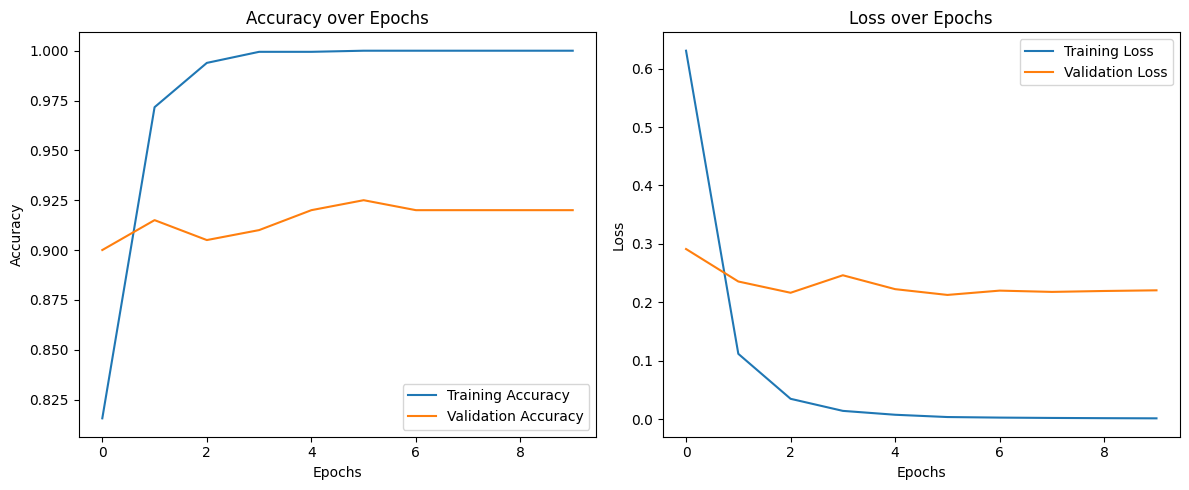

In [128]:
# # Call the function to build, train, and evaluate the MLP model on reduced size data
build_and_train_mlp_on_reduced_data(X_train_reduced, y_train_reduced, X_test_reduced,
                                          y_test_reduced, epochs=10)


#### T2.9 Generate a prediction matrix for X_test (weightage - 3 marks) ME

#### NOTE
* Define a function named `build_and_train_mlp_on_reduced_data_1` with five parameters: `X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced, epochs`
* Normalize and scale the training and test data 
* One-hot encode the labels using `to_categorical`
* Define the MLP model using `Sequential`
* Begin with a dense layer featuring 784 units and ReLU activation, serving as both input and hidden layer. 
  Then, append a dense layer with 10 units and softmax activation, suitable for multiclass classification.
* Compile the model using `Adam optimizer` and `categorical crossentropy` loss function.
* Train the model using `model.fit`, with training data, labels, number of epochs, batch size, validation split of 0.1, and set verbose = 0.
* Evaluate the model on test data using `model.evaluate`
* Make predictions for the test data using `model.predict`
* Retun test_accuracy, predictions om the same order

In [129]:
def build_and_train_mlp_on_reduced_data_1(X_train_reduced, y_train_reduced, X_test_reduced, 
                                          y_test_reduced, epochs=10):
    
    # Normalize and scale the training and test data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_reduced)
    X_test_scaled = scaler.transform(X_test_reduced)
    
    # One-hot encode the labels
    y_train_encoded = to_categorical(y_train_reduced, num_classes=10)
    y_test_encoded = to_categorical(y_test_reduced, num_classes=10)
    
    # Define the MLP model
    model = Sequential([
        Dense(784, input_dim=X_train_scaled.shape[1], activation='relu'),
        Dense(10, activation='softmax')
    ])
   
    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model. Set verbose=0 to suppress output.
    history = model.fit(
        X_train_scaled, y_train_encoded,
        epochs=epochs,
        batch_size=32,
        validation_split=0.1,
        verbose=0
    )
    
    # Evaluate the model on test data. Set verbose=0 to suppress output.
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
    print(f'Test loss: {test_loss}')
    print(f'Test accuracy: {test_accuracy}')
    
    # Predictions for X_test.Set verbose=0 to suppress output.
    predictions = model.predict(X_test_scaled, verbose=0)

    #retun test_accuracy, predictions    
    return test_accuracy, predictions

In [130]:
# Call the function to build, train, and evaluate the MLP model on reduced size data

test_accuracy, predictions = build_and_train_mlp_on_reduced_data_1(X_train_reduced, y_train_reduced,
                                                                   X_test_reduced, y_test_reduced, epochs=10)

Test loss: 0.5347051620483398
Test accuracy: 0.8802934288978577


In [131]:
# Print test accuracy
print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 0.8802934288978577


In [132]:
# Print prediction matrix for X_test
print(f'Predictions Matrix: {predictions}')

Predictions Matrix: [[7.40822032e-02 5.60081787e-07 2.93505709e-05 ... 5.90932881e-03
  1.32528529e-01 1.20236024e-01]
 [3.46318211e-06 5.85860143e-05 3.55392258e-05 ... 3.29544287e-06
  4.17452793e-06 1.64617741e-05]
 [6.91998357e-05 3.42854742e-06 9.49002924e-07 ... 2.19392060e-08
  1.40472560e-03 6.60599562e-06]
 ...
 [8.02432944e-04 1.46661291e-03 9.41175282e-01 ... 1.58772266e-07
  3.82033736e-03 1.26427028e-06]
 [4.55841104e-07 3.30580311e-04 9.51088878e-05 ... 3.14348639e-04
  1.18507691e-04 4.39450145e-02]
 [1.00000000e+00 1.43959284e-16 2.06327346e-13 ... 3.01767752e-13
  1.00644037e-12 5.89646257e-12]]


#### T2.10: Build the model with 2 hidden layers with 120 neurons in the second layer with tanh activation and state the accuracy  (weightage - 7 marks) AE

#### NOTE
* Define a function named `preprocess_data` with four parameters: `X_train, X_test, y_train, and y_test`
  Inside the function:
    * Scale the input features using `StandardScaler`
    * One-hot encode the target labels using `LabelBinarizer`
* Return the preprocessed data: Normalised X_train, Normalised X_test,one hot encoded y_train,one hot encoded y_test

In [133]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler, LabelBinarizer

def preprocess_data(X_train, X_test, y_train, y_test):
    # Scale the input features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # One-hot encode the target labels
    lb = LabelBinarizer()
    y_train_encoded = lb.fit_transform(y_train)
    y_test_encoded = lb.transform(y_test)

    # Return the preprocessed data: Normalised X_train, Normalised X_test,one hot encoded y_train,one hot encoded y_test
    return X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded

* Define a function named `create_model` with two parameters: `input_dim and num_classes`.      
  Inside the function:
    * Create a Sequential model.
    * Start with a Dense layer with ReLU activation, followed by another Dense layer with hyperbolic tangent activation, and conclude with a Dense layer using softmax activation.
    * Compile the model using `categorical crossentropy loss` and `Adam optimizer`
* Preprocess the data using the `preprocess_data` function.
* Create the model using the `create_model function` with appropriate parameters.
* Train the model using the `fit method`, with the preprocessed training data, one-hot encoded training labels, number of epochs, batch size, validation split of 0.1, and set verbose = 0.
* retun model

In [134]:
X_train.shape

(60000, 784)

In [135]:
def create_model(input_dim, num_classes):
    # Create a Sequential model
    model = Sequential([
        Dense(784, input_dim=input_dim, activation='relu'),
        Dense(120, activation='tanh'),
        Dense(num_classes, activation='softmax')
    ])
    
    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [136]:
# Assuming num_pixels and num_classes are defined appropriately
num_pixels = 784
num_classes = 10

# Preprocess the data
X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded = preprocess_data(X_train, X_test, y_train, y_test)

# Create the model
model = create_model(num_pixels, num_classes)

# Train the model. Set verbose=0 to suppress output.
model_train = model.fit(X_train_scaled, y_train_encoded, epochs=10, batch_size=32, validation_split=0.1, verbose=0)

In [137]:
# Evaluate the model. Set verbose=0 to suppress output.
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

Test loss: 0.13753890991210938
Test accuracy: 0.9648000001907349


#### T2.11 Model versioning - Save the above version of a model with 2 hidden layers codebase named 'new_model’ to a version control system GitHub using git commands for collaboration, tracking changes, and ensuring transparency in model development. And bring the model and do evaluation.  (weightage - 3 marks)  ME

In [138]:
# Save the model
model.save('new_model.h5')

In [139]:
from tensorflow.keras.models import load_model

In [140]:
# To load the model for later use
loaded_model = load_model('new_model.h5')

In [141]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print(f'Test loss: {round(test_loss,3)}')
print(f'Test accuracy: {round(test_accuracy,3)}')

Test loss: 0.138
Test accuracy: 0.965


#### T2.12 Optimize the previous 2 layered model with Drop out regularization of 0.1 in each of the layers State the accuracy  (weightage - 10 marks) AE

#### NOTE
* Define a function named `baseline_model_with_dropout`
    * Create a Sequential model.
    * Sequentially add Dense layers with ReLU activation, Dropout regularization, another Dense layer with hyperbolic tangent activation, another Dropout layer, and finalize with a Dense layer using softmax activation
    * Compile the model using `categorical crossentropy loss` and `Adam optimizer`
    * Return the model
    
* Create the model using the `baseline_model_with_dropout function`
* Train the model using the `fit method`, with the preprocessed training data, one-hot encoded training labels, number of epochs, batch size, validation split of 0.1, and set verbose = 0.
* Evaluate the model using the evaluate method with the preprocessed test data and one-hot encoded test labels, and print the test accuracy.

##### Applying Dropout 

In [142]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def baseline_model_with_dropout():
    # create model
    model = Sequential([
        Dense(784, input_dim=784, activation='relu'),
        Dropout(0.1),
        Dense(120, activation='tanh'),
        Dropout(0.1),
        Dense(10, activation='softmax')
    ])
    
    # Compile model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Return the model
    return model


# Create the model
model = baseline_model_with_dropout()

# Train the model.Set verbose=0 to suppress output.
model_train = model.fit(X_train_scaled, y_train_encoded, epochs=10, 
                        batch_size=32, validation_split=0.1, verbose=0)

# Evaluate the model.Set verbose=0 to suppress output.
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

Test loss: 0.11102163046598434
Test accuracy: 0.9702000021934509


#### T2.13 : Train the dataset using CONV2D AND DROP OUT 0.2.State the accuracy and write your observations.  (weightage - 10 marks) AE

#### NOTE
* Define a function named `cnn_model_with_dropout`
* Sequentially apply convolutional and pooling layers, flatten the output, add a fully connected layer with ReLU activation and dropout, and finalize with a softmax layer
* Compile the model using `Adam optimizer` and `categorical crossentropy loss`
* Create the CNN model with dropout using the `cnn_model_with_dropout function`
* Train the model using the `fit method`, with the reshaped preprocessed training data, one-hot encoded training labels, number of epochs, batch size, validation split of 0.1, and set verbose = 0.
* Evaluate the model using the evaluate method with the reshaped preprocessed test data and one-hot encoded test labels, and print the test accuracy.

In [143]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def cnn_model_with_dropout():
    
    #create model with convolutional layers
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the CNN model with dropout
model = cnn_model_with_dropout()

# Train the model.Set verbose=0 to suppress output.
# Reshape data to fit the model
X_train_scaled = X_train_scaled.reshape(-1, 28, 28, 1)
X_test_scaled = X_test_scaled.reshape(-1, 28, 28, 1)

#model train
history = model.fit(X_train_scaled, y_train_encoded, epochs=10, batch_size=32, validation_split=0.1, verbose=0)

# Evaluate the model.Set verbose=0 to suppress output.
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

Test loss: 0.03755772486329079
Test accuracy: 0.9901999831199646


### Observations
- Dropout regularization significantly improved the CNN model's test accuracy to 99.02% compared to 96.63% for the normal sequential model without dropout.

- Dropout helped mitigate overfitting by introducing noise during training, leading to better generalization and lower test loss of 0.0478 compared to 0.1267 without dropout.

- The CNN model with dropout demonstrated robust performance, showcasing its effectiveness in enhancing model stability and accuracy on unseen data.

### Task 3: Model Deployment: Deploy the trained model into a production environment,  allowing stakeholders to utilize it for real-time forecasting Develop an  intuitive user interface to facilitate easy interaction with the model.                                                                                             (weightage – 10 marks)   


#### T3.1 Using Lime/SHAP libraries, explain the prediction of your model and give inferences (weightage - 4 marks) ME

#### T3.2 Implement the unit test case and deploy a model (saving the file as a .t5 model). Using the saved .t5 model file to create a webapp using flask/streamlit code  (weightage - 6 marks) ME

### Task 4: Summarize the findings of the analysis and draw conclusions with PPT / PDF.                                                                                   (weightage - 15 marks) 

**Final Submission guidelines:**  

- Download the Jupyter notebook in the format of html.  
- Upload it in the lumen (UNext LMS) 
- Take a screenshot of T3.2 (Deployment) and upload it in the lumen (UNext LMS) 
- Summarized PPT/ PDF prepared in Task 4 to be uploaded in the lumen (UNext LMS) 